In [1]:
options(device=pdf) # turn off flashy window on each block execution
# options(repr.plot.width=6, repr.plot.height=4)
Sys.setlocale("LC_ALL", "C")
initialWidth = getOption('width')
options(width=80) # for old folks like me who can't see shit and set font large

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [4]:
data = read.csv('data/emails.csv.xz',
                stringsAsFactors=F)
str(data)

'data.frame':	5728 obs. of  2 variables:
 $ text: chr  "Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqg"| __truncated__ "Subject: the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ra"| __truncated__ "Subject: unbelievable new homes made easy  im wanting to show you this  homeowner  you have been pre - approved for a $ 454 , 1"| __truncated__ "Subject: 4 color printing special  request additional information now ! click here  click here for a printable version of our o"| __truncated__ ...
 $ spam: int  1 1 1 1 1 1 1 1 1 1 ...


In [5]:
table(data$spam)


   0    1 
4360 1368 

In [7]:
data$text[1]

[1] "Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction  guaranteed : we provide unlimited amount of changes with no extra fees for you to  be surethat you will love the result of this collaboration . have a look at our  portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ not interested . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _"

In [8]:
max(nchar(data$text))

[1] 43952

In [10]:
which.min(nchar(data$text))

[1] 1992

In [12]:
library(tm)

In [17]:
corpus = Corpus(VectorSource(data$text))
corpus = tm_map(corpus, tolower)
corpus = tm_map(corpus, PlainTextDocument)
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords,
                stopwords('english'))
corpus = tm_map(corpus, stemDocument)
dtm = DocumentTermMatrix(corpus)

In [16]:
dtm

<<DocumentTermMatrix (documents: 5728, terms: 28687)>>
Non-/sparse entries: 481719/163837417
Sparsity           : 100%
Maximal term length: 24
Weighting          : term frequency (tf)

In [19]:
spdtm = removeSparseTerms(dtm, 0.95)
#spdtm = as.data.frame(as.matrix(spdtm))
dim(spdtm)

[1] 5728  330

In [20]:
emailsSparse = as.data.frame(as.matrix(spdtm))
colnames(emailsSparse) = make.names(
    colnames(emailsSparse))

In [21]:
tail(sort(colSums(emailsSparse)))

hou    will    vinc subject     ect   enron 
   5577    8252    8532   10202   11427   13388

In [22]:
emailsSparse$spam = data$spam

In [27]:
t = colSums(subset(emailsSparse, spam==F))
t[t>=5000]

ect   enron     hou subject    vinc    will 
  11417   13388    5569    8625    8531    6802

In [33]:
t = colSums(subset(emailsSparse, spam==T))
t[t>=1000]

compani subject    will    spam 
   1065    1577    1450    1368

In [34]:
emailsSparse$spam = as.factor(data$spam)
library(caTools)
set.seed(123)
spl = sample.split(emailsSparse$spam, 0.7)
train = subset(emailsSparse, spl==T)
test = subset(emailsSparse, spl==F)

In [50]:
spamLog = glm(spam ~ ., data=train,
              family='binomial')
library(rpart)
library(rpart.plot)
spamCART = rpart(spam ~ ., data=train,
                 method='class')
library(randomForest)
set.seed(123)
spamRF = randomForest(spam ~ ., data=train)

Warning message:
: glm.fit: algorithm did not convergeWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred

In [51]:
predLog = predict(spamLog, type='response')
predCART = predict(spamCART)[,2]
predRF = predict(spamRF, type='prob')[,2]

In [52]:
sum(predLog < 0.00001)
sum(predLog > 0.99999)
sum((predLog <= 0.99999) & (predLog >= 0.00001))

[1] 3046

[1] 954

[1] 10

In [48]:
summary(spamLog)


Call:
glm(formula = spam ~ ., family = "binomial", data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.011   0.000   0.000   0.000   1.354  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -3.082e+01  1.055e+04  -0.003    0.998
X000         1.474e+01  1.058e+04   0.001    0.999
X2000       -3.631e+01  1.556e+04  -0.002    0.998
X2001       -3.215e+01  1.318e+04  -0.002    0.998
X713        -2.427e+01  2.914e+04  -0.001    0.999
X853        -1.212e+00  5.942e+04   0.000    1.000
abl         -2.049e+00  2.088e+04   0.000    1.000
access      -1.480e+01  1.335e+04  -0.001    0.999
account      2.488e+01  8.165e+03   0.003    0.998
addit        1.463e+00  2.703e+04   0.000    1.000
address     -4.613e+00  1.113e+04   0.000    1.000
allow        1.899e+01  6.436e+03   0.003    0.998
alreadi     -2.407e+01  3.319e+04  -0.001    0.999
also         2.990e+01  1.378e+04   0.002    0.998
analysi     -2.405e+01  3.860e+04  -0.001    1.000

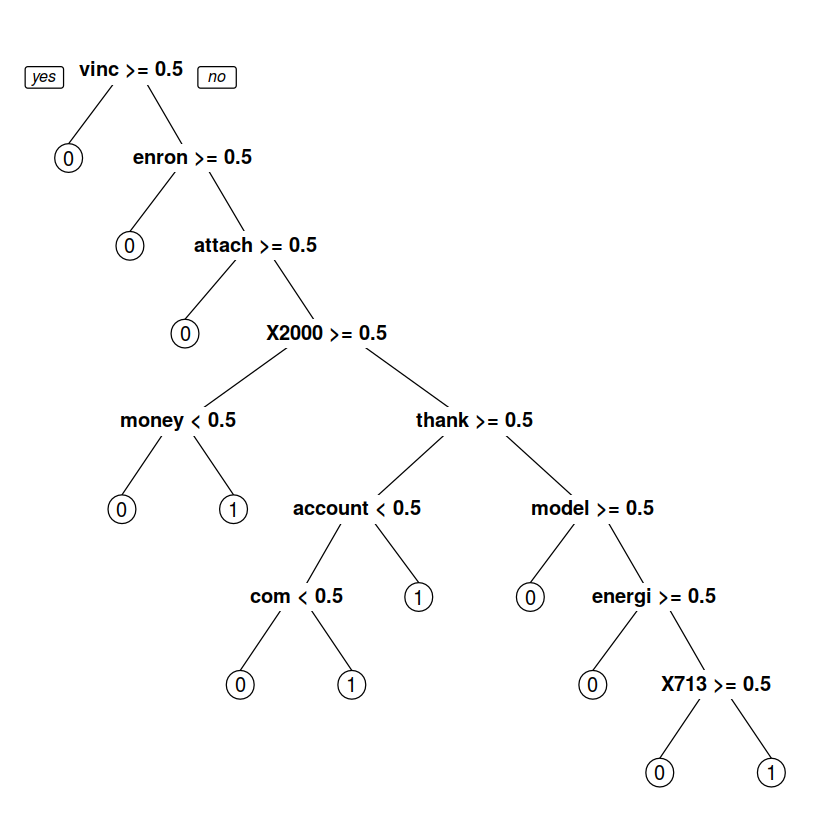

In [53]:
prp(spamCART)

In [55]:
t = table(train$spam, predLog >= 0.5)
t
sum(diag(t))/sum(t)

   
    FALSE TRUE
  0  3052    0
  1     4  954

[1] 0.9990025

In [56]:
library(ROCR)
pred = prediction(predLog, train$spam)
# AUC
as.numeric(performance(pred, 'auc')@y.values)

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



[1] 0.9999959

In [58]:
t = table(train$spam, predCART >= 0.5)
t
sum(diag(t))/sum(t)

   
    FALSE TRUE
  0  2885  167
  1    64  894

[1] 0.942394

In [59]:
pred = prediction(predCART, train$spam)
# AUC
as.numeric(performance(pred, 'auc')@y.values)

[1] 0.9696044

In [60]:
t = table(train$spam, predRF >= 0.5)
t
sum(diag(t))/sum(t)

   
    FALSE TRUE
  0  3013   39
  1    44  914

[1] 0.9793017

In [61]:
pred = prediction(predRF, train$spam)
# AUC
as.numeric(performance(pred, 'auc')@y.values)

[1] 0.9979116

In [62]:
predTestLog = predict(spamLog, newdata=test,
                      type='response')
predTestCART = predict(spamCART, newdata=test)[,2]
predTestRF = predict(spamRF, newdata=test,
                     type='prob')[,2]

In [69]:
t = table(test$spam, predTestLog >= 0.5)
t
sum(diag(t))/sum(t)

pred = prediction(predTestLog, test$spam)
# AUC
as.numeric(performance(pred, 'auc')@y.values)

t = table(test$spam, predTestCART >= 0.5)
t
sum(diag(t))/sum(t)

pred = prediction(predTestCART, test$spam)
# AUC
as.numeric(performance(pred, 'auc')@y.values)

t = table(test$spam, predTestRF >= 0.5)
t
sum(diag(t))/sum(t)

pred = prediction(predTestRF, test$spam)
# AUC
as.numeric(performance(pred, 'auc')@y.values)

   
    FALSE TRUE
  0  1257   51
  1    34  376

[1] 0.9505239

[1] 0.9627517

   
    FALSE TRUE
  0  1228   80
  1    24  386

[1] 0.9394645

[1] 0.963176

   
    FALSE TRUE
  0  1290   18
  1    24  386

[1] 0.975553

[1] 0.9975656

In [72]:
# End of part 1

IMPORTANT NOTE: If you received an error message when running the command above, it might be because your computer ran out of memory when trying to convert dtm to a matrix. If this happened to you, try running the following lines of code instead to create wordCount (if you didn't get an error, you don't need to run these lines). This code is a little more cryptic, but is more memory efficient.

library(slam)

wordCount = rollup(dtm, 2, FUN=sum)$v

When you have successfully created wordCount, answer the following question.

In [71]:
wordCount = rowSums(as.matrix(dtm))

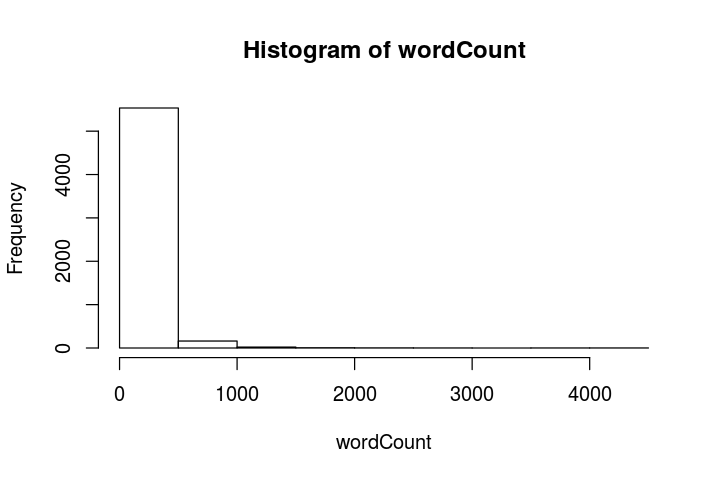

In [75]:
options(repr.plot.width=6, repr.plot.height=4)
hist(wordCount)

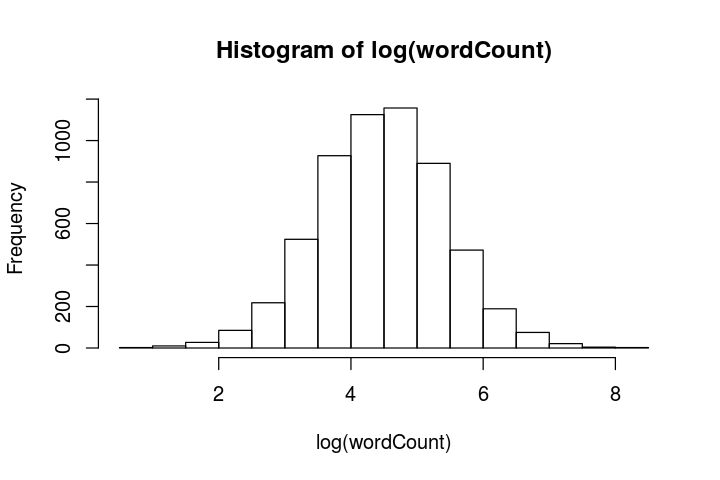

In [76]:
options(repr.plot.width=6, repr.plot.height=4)
hist(log(wordCount))

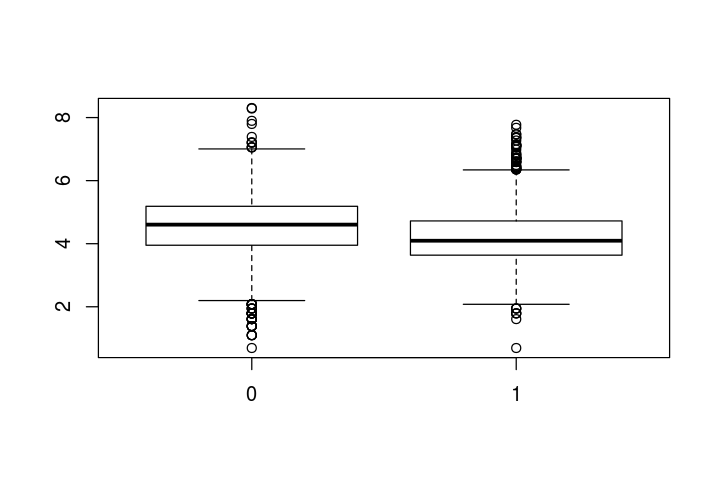

In [80]:
emailsSparse$logWordCount = log(wordCount)
#boxplot(logWordCount ~ spam, data = emailsSparse)
boxplot(emailsSparse$logWordCount ~ emailsSparse$spam)

In [81]:
train2 = subset(emailsSparse, spl==T)
test2 = subset(emailsSparse, spl==F)

In [82]:
spam2CART = rpart(spam ~ ., data=train2,
                  method='class')
set.seed(123)
spam2RF = randomForest(spam ~ ., data=train2)

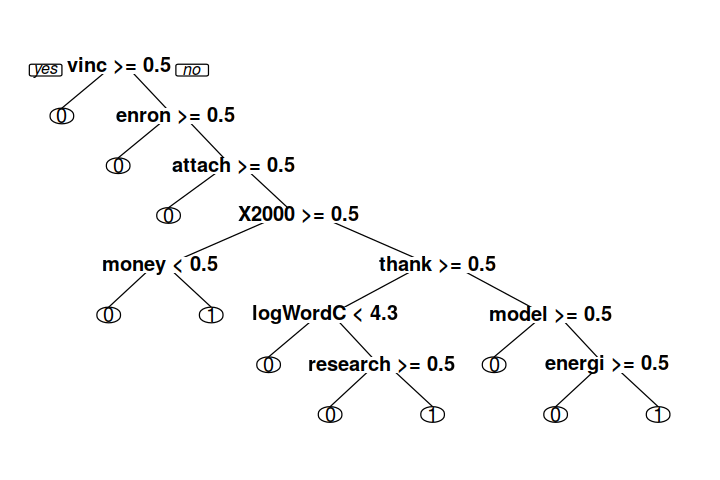

In [83]:
prp(spam2CART)

In [84]:
predTest2CART = predict(spam2CART,
                        newdata=test2)[,2]
predTest2RF = predict(spam2RF, newdata=test2,
                     type='prob')[,2]

t = table(test2$spam, predTest2CART >= 0.5)
t
sum(diag(t))/sum(t)

pred = prediction(predTest2CART, test2$spam)
# AUC
as.numeric(performance(pred, 'auc')@y.values)

t = table(test2$spam, predTest2RF >= 0.5)
t
sum(diag(t))/sum(t)

pred = prediction(predTest2RF, test2$spam)
# AUC
as.numeric(performance(pred, 'auc')@y.values)

   
    FALSE TRUE
  0  1214   94
  1    26  384

[1] 0.9301513

[1] 0.9582438

   
    FALSE TRUE
  0  1296   12
  1    27  383

[1] 0.9772992

[1] 0.9980905

USING N-GRAMS

Another source of information that might be extracted from text is the frequency of various n-grams. An n-gram is a sequence of n consecutive words in the document. For instance, for the document "Text analytics rocks!", which we would preprocess to "text analyt rock", the 1-grams are "text", "analyt", and "rock", the 2-grams are "text analyt" and "analyt rock", and the only 3-gram is "text analyt rock". n-grams are order-specific, meaning the 2-grams "text analyt" and "analyt text" are considered two separate n-grams. We can see that so far our analysis has been extracting only 1-grams.

We do not have exercises in this class covering n-grams, but if you are interested in learning more, the "RTextTools", "tau", "RWeka", and "textcat" packages in R are all good resources.